<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-1-phase-2-ajak-cp/blob/main/DATA_301_Lab_1B_Ava_Jakusovszky_%26_Michael_Greene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

The small dataset made it beneficial to generalize colors, ie light blue is just blue. The visualization shows a dramatic favor to blue tones, but most of the popular colors all fall in the cool tone category. 

In [4]:
import pandas as pd
df_class = pd.read_csv("CSR.csv")
df_class.head()

,What is your major?,Where are you living this quarter?,How many siblings do you have?,What is your favorite color?,"What is a cool TV show, movie, or book that you liked in 2020?",Suppose you wanted to fill an average-sized school bus entirely with golf balls. How many golf balls do you think you would need?,Do you consider yourself a sports fan?,Do you enjoy video games?,Do you consider yourself artistic?
0,Other,"Off Campus, but in SLO",2,Light Blue,Criminal Minds,500000.0,No,Yes,Yes
1,Statistics,"Off Campus, outside of SLO",5,green,A Gentleman in Moscow,930000.0,No,No,No
2,Computer Science,"Off Campus, but in SLO",2,blue,Crescent City by Sarah J Maas,10000000.0,Yes,No,Yes
3,Other,"Off Campus, outside of SLO",2,Green,The Institute by Stephen King,400000.0,No,No,Yes
4,Computer Science,"Off Campus, outside of SLO",1,Blue/Indigo,Peaky Blinders,100000.0,Yes,Yes,No


**TYPE YOUR WRITTEN EXPLANATION HERE.**

In [22]:

def class_to_type(c):
  c = c.lower()
  if "blue" in c:
    return "Blue"
  elif "green" in c:
    return "Green"
  elif "red" in c:
    return "Red"
  elif "purple" in c:
    return "Purple"
  elif "pink" in c:
    return "Pink"
  elif "black" in c:
    return "Black"
  elif "grey" in c or "gray" in c:
    return "Grey/Gray"
  elif c == '':
    return "Declined to Say"
  else:
    return c.capitalize()
df_class["What is your favorite color?"] = df_class["What is your favorite color?"].fillna('')
df_class
df_class["General Color"] = df_class["What is your favorite color?"].map(class_to_type)


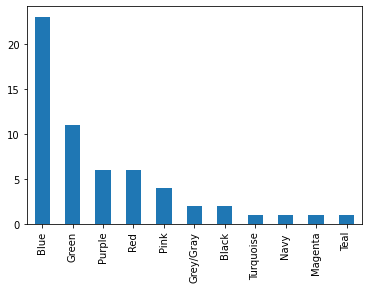

In [23]:
df_class["General Color"].value_counts().plot.bar()

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

In [7]:
df_class["Where are you living this quarter?"].value_counts()

Off Campus, but in SLO        30
Off Campus, outside of SLO    25
On-Campus housing              2
Name: Where are you living this quarter?, dtype: int64

In [8]:
def class_to_type(c):
  if c in ["Off Campus, but in SLO", "On-Campus housing"]:
    return "In SLO"
  else:
    return "Outside SLO"
df_class["Where are you living this quarter?"] = df_class["Where are you living this quarter?"].fillna('')
df_class["General: Where are you living this quarter?"] = df_class["Where are you living this quarter?"].map(class_to_type)
joint_sib_and_slo = pd.crosstab(df_class["General: Where are you living this quarter?"],df_class["How many siblings do you have?"], normalize=True)
joint_sib_and_slo

How many siblings do you have?,0,1,2,3,5
General: Where are you living this quarter?,,,,,
In SLO,0.017241,0.275862,0.224138,0.034483,0.000000
Outside SLO,0.068966,0.155172,0.120690,0.068966,0.034483


In [9]:
inout_dist = joint_sib_and_slo.sum(axis=0) 
inout_dist
# axis = 0 adds columns; axis = 1 adds rows
cond_inout = joint_sib_and_slo.divide(inout_dist, axis=1)
cond_inout

How many siblings do you have?,0,1,2,3,5
General: Where are you living this quarter?,,,,,
In SLO,0.2,0.64,0.65,0.333333,0.0
Outside SLO,0.8,0.36,0.35,0.666667,1.0


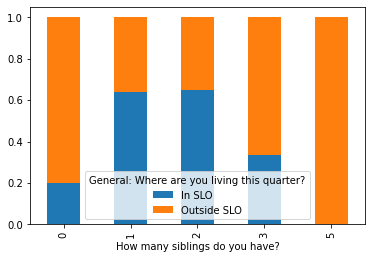

In [25]:
cond_inout.T.plot.bar(stacked=True)

Based on the data, it seems that the probability a student will live off of campus follows a bell as the number of siblings increase. With low numbers like 0, the probability of off-campus housing is high. With an average of siblings (1-3), the probability decreases, then as sibling number grows to 5, the probability increases once more. This suggests that those with no sibilings and those with an above avaerage number are more likely to live off campus.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

In [11]:
df_class.value_counts()

What is your major?  Where are you living this quarter?  How many siblings do you have?  What is your favorite color?  What is a cool TV show, movie, or book that you liked in 2020?                         Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?  Do you consider yourself a sports fan?  Do you enjoy video games?  Do you consider yourself artistic?  General Color  General: Where are you living this quarter?
Statistics           On-Campus housing                   2                               Red                           Parasite                                                                               1.200000e+05                                                                                                                        No                                      Yes                        No                                  Red            In SLO                                      

In [12]:
def golf_range(c):
  if c <= 10000:
    return "Less than or equal to 10,000"
  elif c <= 100000:
    return "Between 10,001 and 100,000"
  elif c <= 500000:
    return "Between 100,001 and 500,000"
  elif c <= 1000000:
    return "Between 500,001 and 1,000,000"
  elif c <= 5000000:
    return "Between 1,000,001 and 5,000,000"
  else:
    return "More than 5,000,000"

df_class["Golf Range"] = df_class["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"].map(golf_range)
df_class.head()

,What is your major?,Where are you living this quarter?,How many siblings do you have?,What is your favorite color?,"What is a cool TV show, movie, or book that you liked in 2020?",Suppose you wanted to fill an average-sized school bus entirely with golf balls. How many golf balls do you think you would need?,Do you consider yourself a sports fan?,Do you enjoy video games?,Do you consider yourself artistic?,General Color,General: Where are you living this quarter?,Golf Range
0,Other,"Off Campus, but in SLO",2,Light Blue,Criminal Minds,500000.0,No,Yes,Yes,Blue,In SLO,"Between 100,001 and 500,000"
1,Statistics,"Off Campus, outside of SLO",5,green,A Gentleman in Moscow,930000.0,No,No,No,Green,Outside SLO,"Between 500,001 and 1,000,000"
2,Computer Science,"Off Campus, but in SLO",2,blue,Crescent City by Sarah J Maas,10000000.0,Yes,No,Yes,Blue,In SLO,"More than 5,000,000"
3,Other,"Off Campus, outside of SLO",2,Green,The Institute by Stephen King,400000.0,No,No,Yes,Green,Outside SLO,"Between 100,001 and 500,000"
4,Computer Science,"Off Campus, outside of SLO",1,Blue/Indigo,Peaky Blinders,100000.0,Yes,Yes,No,Blue,Outside SLO,"Between 10,001 and 100,000"


In [13]:
joint_maj_golf = pd.crosstab(df_class["What is your major?"],df_class["Golf Range"], normalize=True)
joint_maj_golf

Golf Range,"Between 1,000,001 and 5,000,000","Between 10,001 and 100,000","Between 100,001 and 500,000","Between 500,001 and 1,000,000","Less than or equal to 10,000","More than 5,000,000"
What is your major?,,,,,,
Computer Science,0.017241,0.103448,0.120690,0.137931,0.086207,0.034483
Other,0.017241,0.034483,0.051724,0.017241,0.103448,0.017241
Statistics,0.034483,0.051724,0.051724,0.068966,0.051724,0.000000


In [14]:
majgolf_dist = joint_maj_golf.sum(axis=0) 
majgolf_dist
# axis = 0 adds columns; axis = 1 adds rows


Golf Range
Between 1,000,001 and 5,000,000    0.068966
Between 10,001 and 100,000         0.189655
Between 100,001 and 500,000        0.224138
Between 500,001 and 1,000,000      0.224138
Less than or equal to 10,000       0.241379
More than 5,000,000                0.051724
dtype: float64

In [15]:
cond_mg = joint_maj_golf.divide(majgolf_dist, axis=1)
cond_mg

Golf Range,"Between 1,000,001 and 5,000,000","Between 10,001 and 100,000","Between 100,001 and 500,000","Between 500,001 and 1,000,000","Less than or equal to 10,000","More than 5,000,000"
What is your major?,,,,,,
Computer Science,0.25,0.545455,0.538462,0.615385,0.357143,0.666667
Other,0.25,0.181818,0.230769,0.076923,0.428571,0.333333
Statistics,0.50,0.272727,0.230769,0.307692,0.214286,0.000000


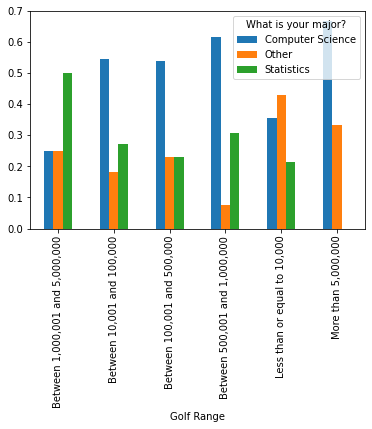

In [26]:
cond_mg.T.plot.bar()

Each student gave a specific numeric answer. No two answers were identical, so just generalizing with a histogram would not have been helpful. Rather than numeric specifics, the range of numbers provided reasonable suspicions as to why or how that a student found a solution. In drastic scenarios, there were low ballers who perhaps just guessed or did not spend a ton of time considering the problem, people who matched around the guesses from the source, perhaps more analytically, and big picture thinkers who went big with guesses. With this specific group, big and small are subjective, so breaking the guesses into ranges allowed a personality categorizing system that still summed up the data. That is to say, it is more meaning ful to draw a distinction between 5000 and 5 million than 5000 and 5001.

Reaching a conclusion would be rooted in logic, and logic is taught through education. The natural conditional to this question was the students' majors. Stats majors frequently guessed on the lower end, CS majors were more prevalant in the higher number guesses, and the all encompassing "other" category was scattered between all of the ranges, logical because they all have variety in their taught logic. 

Our team wanted to look at this from a more general angle, with more forgiveness for numerical error. We adapted our perception of a "correct guess" to be to the same order of magintude as the answers supplied.



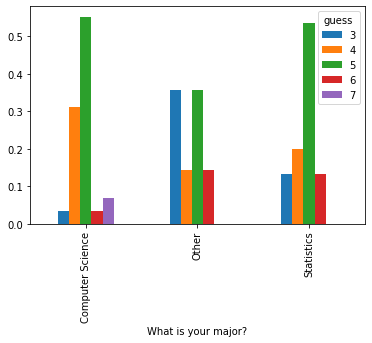

In [27]:
import math

def get_order_of_magnitude(g):
  return math.floor(math.log(g, 10))

df_class["guess"] = df_class["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"].map(get_order_of_magnitude)
joint_guess_major = pd.crosstab(df_class["guess"], df_class["What is your major?"], normalize=True)
major_dist = joint_guess_major.sum(axis=0)
cond_guess_major = joint_guess_major.divide(major_dist, axis=1)
cond_guess_major.T.plot.bar()

Both of these analyses have validity in thought process, and provide simialr conclusions, but shape the framework of success differently. 

## Question 4

Write and answer your own question using this data set.

If a student from DATA 301 was selected at random, based on their major, what is the probability that they consider themself:
1. A sports fan 

P(sports fan|Stats Major) = 0.111111

P(sports fan|CS Major) = 0.722222

P(sports fan|Not CS or Stats) = 0.166667

2. Artistic

P(artistic|Stats Major) = 0.214286

P(artistic|CS Major) = 0.428571

P(artistic|Not CS or Stats) = 0.357143

3. Both a sports fan and artistic

P(Both|Stats Major) = 0.333333

P(Both|CS Major) = 0.333333

P(Both|Not CS or Stats) = 0.333333

4. Neither a sports fan or artistic

P(Neither|Stats Major) = 0.411765

P(Neither|CS Major) = 0.411765	

P(Neither|Not CS or Stats) = 0.176471

These results support that sports are more exclusively favored by CS majors. 

In [17]:
df_both = df_class[(df_class["Do you consider yourself a sports fan?"] == "Yes") & (df_class["Do you consider yourself artistic?"]=="Yes")]
df_both["Interests"] = "Both"
df_sport = df_class[(df_class["Do you consider yourself a sports fan?"] == "Yes") & (df_class["Do you consider yourself artistic?"]=="No")]
df_sport["Interests"] = "Sports"
df_art = df_class[(df_class["Do you consider yourself a sports fan?"] == "No") & (df_class["Do you consider yourself artistic?"]=="Yes")]
df_art["Interests"] = "Arts"
df_none = df_class[(df_class["Do you consider yourself a sports fan?"] == "No") & (df_class["Do you consider yourself artistic?"]=="No")]
df_none["Interests"] = "Neither"

df_interest = pd.concat([df_sport, df_both, df_art, df_none])
df_interest

joint_interests = pd.crosstab(df_interest["What is your major?"], df_interest["Interests"],normalize=True)
joint_interests
int_dist = joint_interests.sum(axis=0) 
int_dist
# axis = 0 adds columns; axis = 1 adds rows
cond_ = joint_interests.divide(int_dist, axis=1)
cond_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Interests,Arts,Both,Neither,Sports
What is your major?,,,,
Computer Science,0.428571,0.333333,0.411765,0.722222
Other,0.357143,0.333333,0.176471,0.166667
Statistics,0.214286,0.333333,0.411765,0.111111


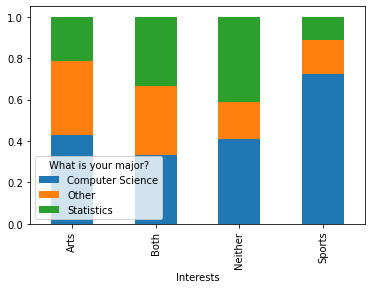

In [18]:
cond_.T.plot.bar(stacked=True)